<a href="https://colab.research.google.com/github/indrabna/PRAKTIKUM_DATMIN/blob/main/B2_2109116084_Muhammad_Indra_Buana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import statistics
import plotly.express as px

#Data Understanding


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/fnikolas-r/Data-Mining-Course/main/Pertemuan%202/ChurnBank.csv")

In [ ]:
# Tampilkan Data
df

In [ ]:
df_1 = df[df["Attrition_Flag"]=="Attrited Customer"]

In [ ]:
# Tampilkan data
df_1

In [ ]:
df_2 = df[df["Attrition_Flag"]!="Attrited Customer"]

In [ ]:
df_2

In [ ]:
df_3 =df[df["Customer_Age"]<50]

In [ ]:
df_3

In [ ]:
df_4 = df[df["Marital_Status"]=="Single"]

In [ ]:
df_4

In [ ]:
df.info()

#Nilai Optional

In [ ]:
# Nilai Optional Unnamed
Un1 = df['Unnamed: 0'].mean()
Un2 = df['Unnamed: 0'].min()
Un3 = df['Unnamed: 0'].max()
Un4 = statistics.stdev(df['Unnamed: 0'])

# Nilai Optional CLIENTNUM
CL1 = df['CLIENTNUM'].mean()
CL2 = df['CLIENTNUM'].min()
CL3 = df['CLIENTNUM'].max()
CL4 = statistics.stdev(df['CLIENTNUM'])

# Nilai Optional Customer_Age
CA1 = df['Customer_Age'].mean()
CA2 = df['Customer_Age'].min()
CA3 = df['Customer_Age'].max()
CA4 = statistics.stdev(df['Customer_Age'])

# Nilai Optional Credit_Limit
CR1 = df['Credit_Limit'].mean()
CR2 = df['Credit_Limit'].min()
CR3 = df['Credit_Limit'].max()
CR4 = statistics.stdev(df['Credit_Limit'])

In [ ]:
print("Kolom             : Unnamed;0")
print("Mean              :", Un1)
print("Min               :", Un2)
print("Max               :", Un3)
print("Standar Deviasi   :", Un4)

print("\nKolom             : CLIENTNUM")
print("Mean              :", CL1)
print("Min               :", CL2)
print("Max               :", CL3)
print("Standar Deviasi   :", CL4)

print("\nKolom             : Customer_Age")
print("Mean              :", CA1)
print("Min               :", CA2)
print("Max               :", CA3)
print("Standar Deviasi   :", CA4)

print("\nKolom             : Credit_Limit")
print("Mean              :", CR1)
print("Min               :", CR2)
print("Max               :", CR3)
print("Standar Deviasi   :", CR4)

Kolom             : Unnamed;0
Mean              : 6105.1
Min               : 176
Max               : 10084
Standar Deviasi   : 2850.304026258473

Kolom             : CLIENTNUM
Mean              : 742489304.25
Min               : 709222008
Max               : 809844108
Standar Deviasi   : 40455244.91809004

Kolom             : Customer_Age
Mean              : 47.25
Min               : 32
Max               : 59
Standar Deviasi   : 7.859791077978707

Kolom             : Credit_Limit
Mean              : 8114.579999999999
Min               : 1438.3
Max               : 26792.0
Standar Deviasi   : 8331.036819444946


#Explore Data

##Visualisasi Comparison

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

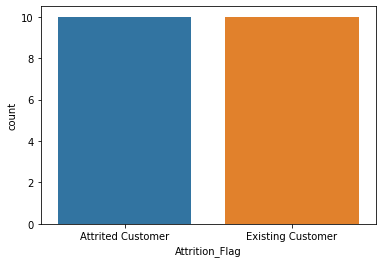

In [ ]:
sns.countplot(data=df,x="Attrition_Flag")

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

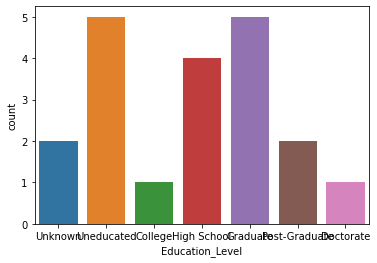

In [ ]:
sns.countplot(data=df,x="Education_Level")

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

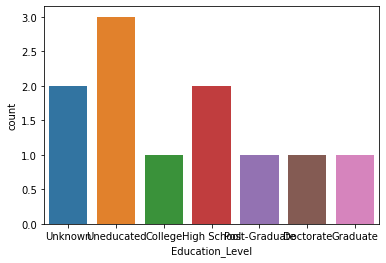

In [ ]:
sns.countplot(data=df[df['Gender']== "M"],x="Education_Level")

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

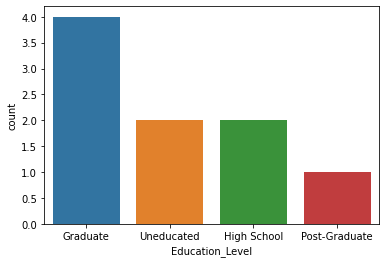

In [ ]:
sns.countplot(data=df[df['Gender']== "F"],x="Education_Level")

##Visualisasi Distribution

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

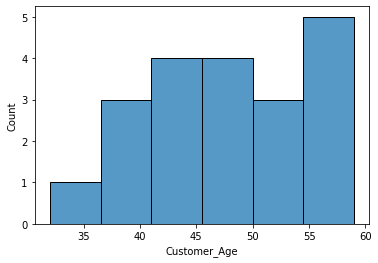

In [ ]:
sns.histplot(data=df,x="Customer_Age")

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

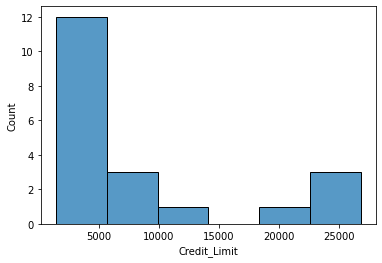

In [ ]:
sns.histplot(data=df,x="Credit_Limit")

<AxesSubplot:xlabel='Customer_Age'>

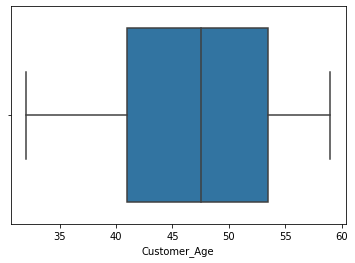

In [ ]:
sns.boxplot(data=df,x="Customer_Age")

<AxesSubplot:xlabel='Credit_Limit'>

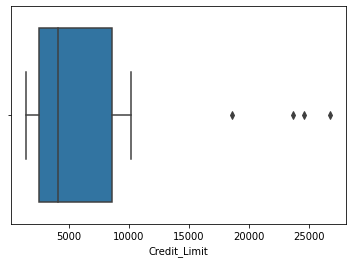

In [ ]:
sns.boxplot(data=df,x="Credit_Limit")

##Visualisasi Relationship

<AxesSubplot:xlabel='Customer_Age', ylabel='Credit_Limit'>

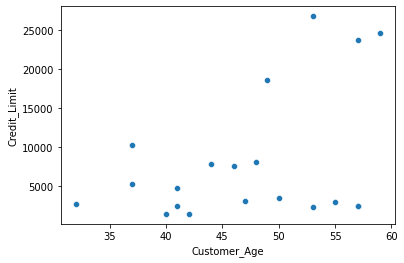

In [ ]:
sns.scatterplot(data=df,x="Customer_Age",y="Credit_Limit")

##Visualisasi Composotion

In [ ]:
px.pie(df,names="Income_Category")

In [ ]:
px.pie(df,names="Education_Level")

## Optional

<AxesSubplot:xlabel='Credit_Limit', ylabel='Gender'>

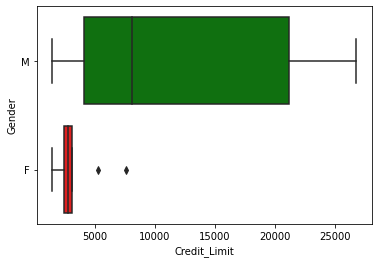

In [ ]:
sns.boxplot(data=df,x="Credit_Limit",y="Gender",  palette= ["Green","Red"])

<AxesSubplot:xlabel='Credit_Limit', ylabel='Attrition_Flag'>

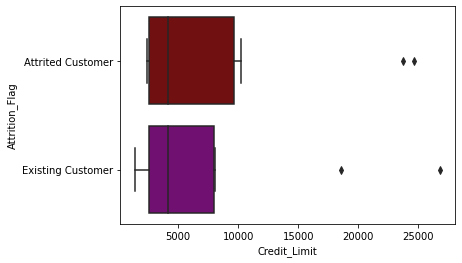

In [ ]:
sns.boxplot(data=df,x="Credit_Limit",y="Attrition_Flag",  palette= ["maroon","purple"])

<AxesSubplot:xlabel='Customer_Age', ylabel='Attrition_Flag'>

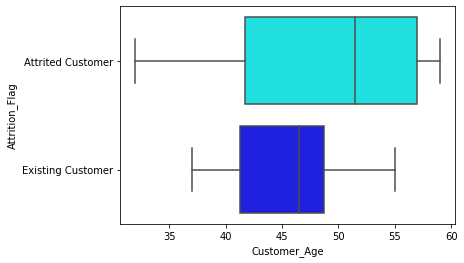

In [ ]:
sns.boxplot(data=df,x="Customer_Age",y="Attrition_Flag",  palette= ["Aqua","Blue"])

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

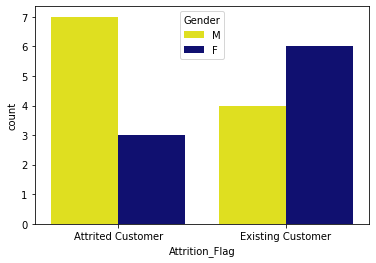

In [ ]:
sns.countplot(data=df,x="Attrition_Flag", hue="Gender", palette=["Yellow","Navy"])

<AxesSubplot:>

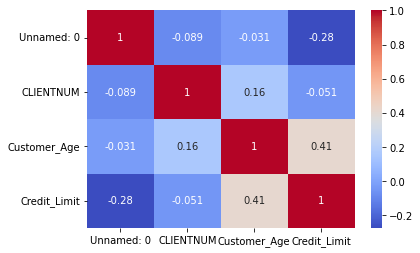

In [ ]:
df_numeric = df.select_dtypes(include=['int64','float64'])
sns.heatmap(df_numeric.corr(),annot=True, cmap='coolwarm')

#Naive Bayes

In [3]:
# Membaca data training
data_train = pd.read_csv('https://raw.githubusercontent.com/fnikolas-r/Data-Mining-Course/main/Pertemuan%202/ChurnBank.csv')

# hapus data sesuai ketentuan
data_train = data_train.drop(["Unnamed: 0", "CLIENTNUM", "Customer_Age", "Credit_Limit"], axis=1)

# memindah data attrition_flag ke ujung kanan
cols = data_train.columns.tolist()
cols.remove('Attrition_Flag')
cols.append('Attrition_Flag')
data_train = data_train[cols]

# Fungsi Naive Bayes Classifier
def naive_bayes(x):
    # Menghitung jumlah data training dan data testing
    N_train = len(data_train)

    # Menghitung jumlah kelas target
    target_counts = data_train.groupby('Attrition_Flag')['Attrition_Flag'].count()

    # Menghitung probabilitas priori untuk setiap kelas target
    prior_prob = target_counts / N_train

    # Menghitung probabilitas kondisional untuk setiap fitur pada setiap kelas target
    cond_prob = {}
    for col in data_train.columns[:-1]:
        cond_prob[col] = {}
        for val in data_train[col].unique():
            for target in data_train['Attrition_Flag'].unique():
                count = len(data_train[(data_train[col] == val) & (data_train['Attrition_Flag'] == target)])
                cond_prob[col][(val, target)] = count / target_counts[target]

            # Pembuktian perhitungan parameter
            # print([val,target], cond_prob[col][(val,target)])
    prob_yes = prior_prob['Attrited Customer']
    prob_no = prior_prob['Existing Customer']
    for i, col in enumerate(data_train.columns[:-1]):
        prob_yes *= cond_prob[col][(x[i], 'Attrited Customer')]
        prob_no *= cond_prob[col][(x[i], 'Existing Customer')]
    if prob_no > prob_yes:
        return ('Existing Customer', prob_no)
    else:
        return ('Attrited Customer', prob_yes)

# Contoh penggunaan fungsi naive_bayes
output = naive_bayes(["F","Uneducated","Single","Unknown","Blue"])
print("\nHASIL =", output)


HASIL = ('Existing Customer', 0.0135)
